In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

from mlp import MLPClassifier
from utils import column_transformer, tree_column_transformer, VIF_SELECTED_VARIABES, ModelComparator, ModelEnsemble

In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier, VotingClassifier, HistGradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from xgboost import XGBClassifier 

In [66]:
models = [
    XGBClassifier(n_estimators=50, random_state=42),
    RandomForestClassifier(random_state=42),
    LogisticRegression(penalty="elasticnet", solver="saga", random_state=42, l1_ratio=0.5),
    SVC(probability=True),
    MLPClassifier(),
    KNeighborsClassifier(),
    AdaBoostClassifier(random_state=42),
    ModelEnsemble(models=[RandomForestClassifier(random_state=42), SVC(probability=True)], voting="mean"),
    ModelEnsemble(models=[LogisticRegression(random_state=42), GaussianNB(), ExtraTreeClassifier()], voting="mean"),
    ModelEnsemble(models=[MLPClassifier(), RandomForestClassifier(random_state=42), AdaBoostClassifier(random_state=42)], voting="median")
]

# Top variables

In [67]:
X = pd.read_table('x_train.txt', sep=" ", header=None)
X.columns = [str(i) for i in range(X.shape[1])]
y = pd.read_table('y_train.txt', header=None).to_numpy(dtype=np.int8).squeeze()

0


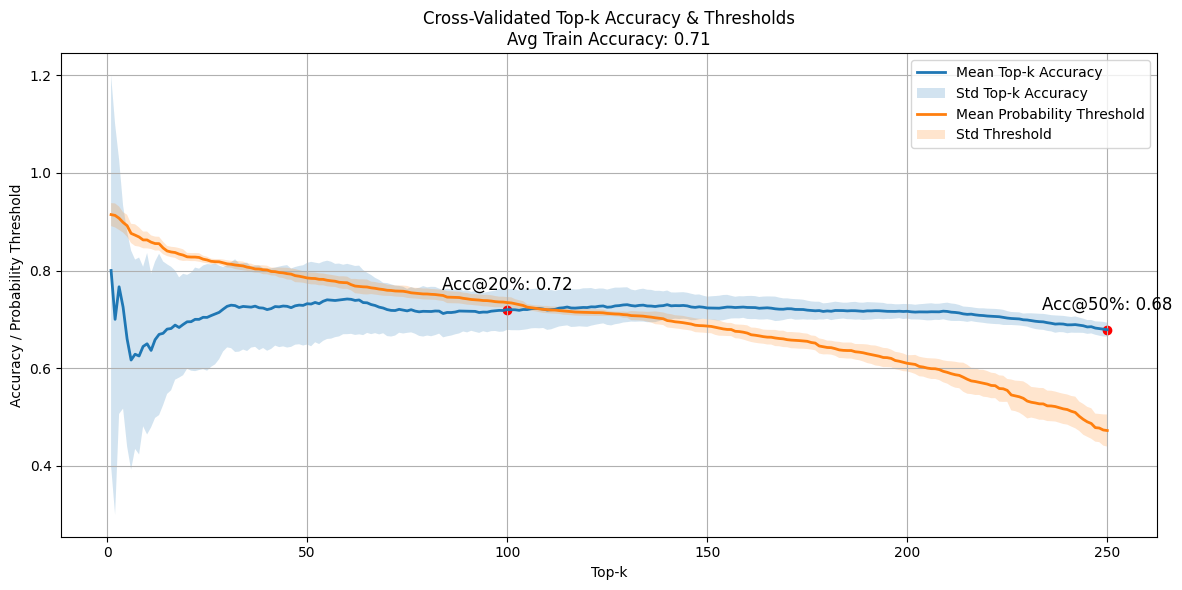

Test Accuracies (Overall): 0.69 ± 0.02
1


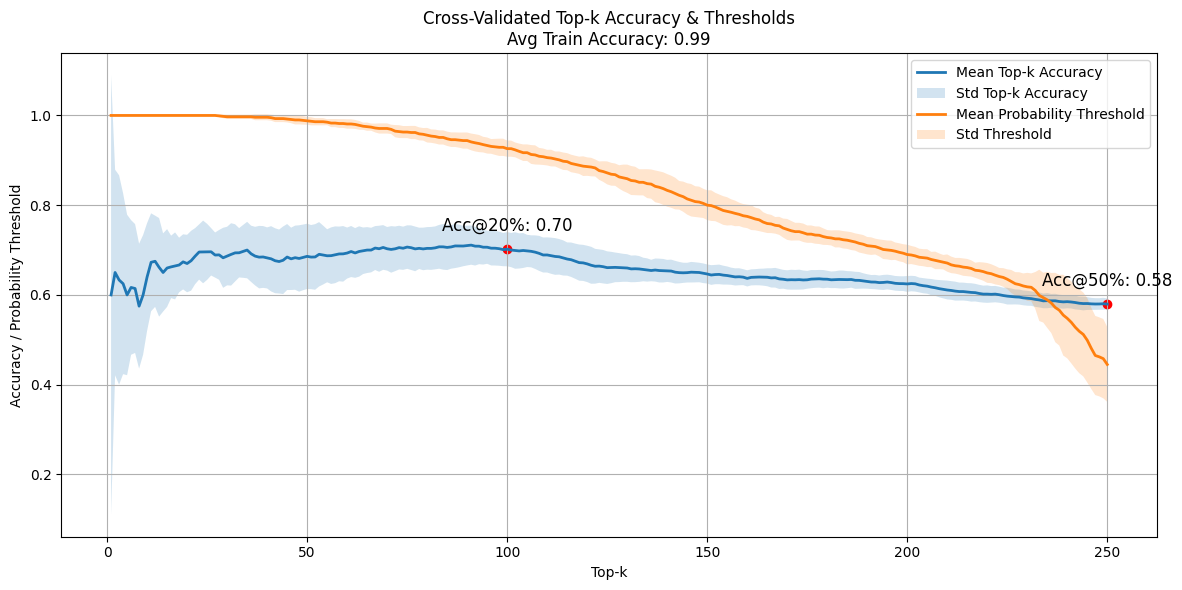

Test Accuracies (Overall): 0.59 ± 0.01
2


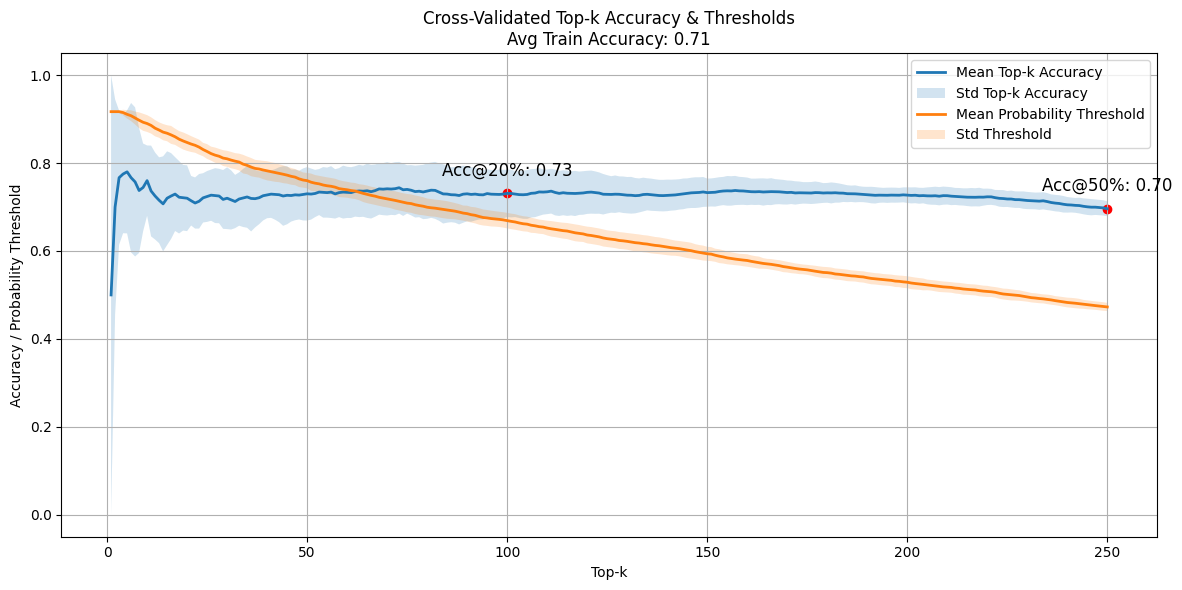

Test Accuracies (Overall): 0.71 ± 0.02
3


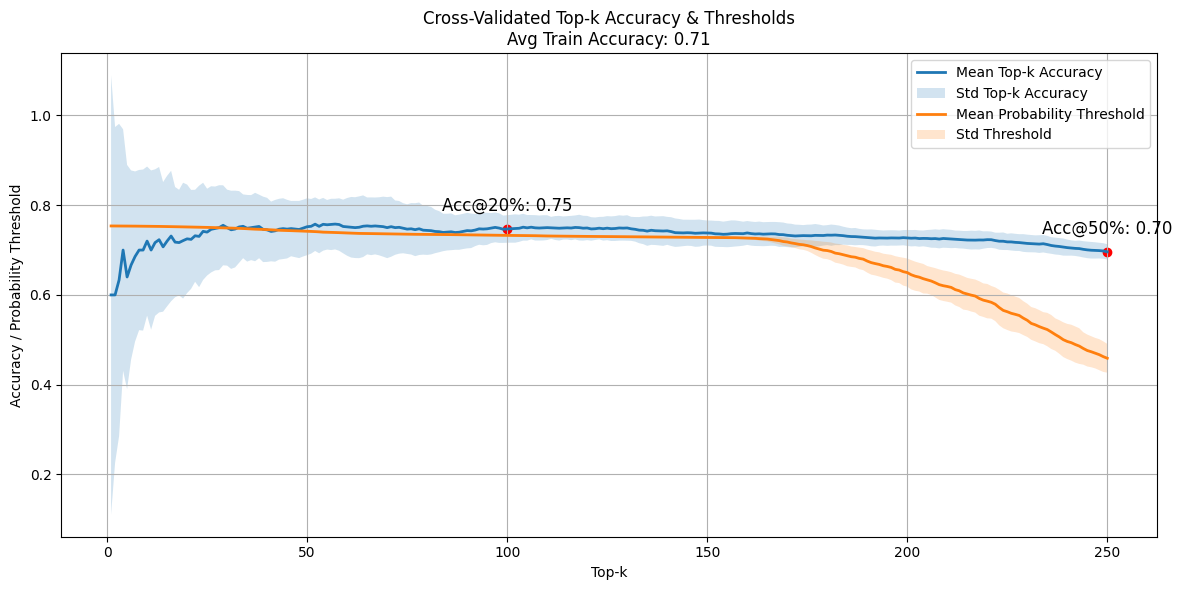

Test Accuracies (Overall): 0.71 ± 0.02
4


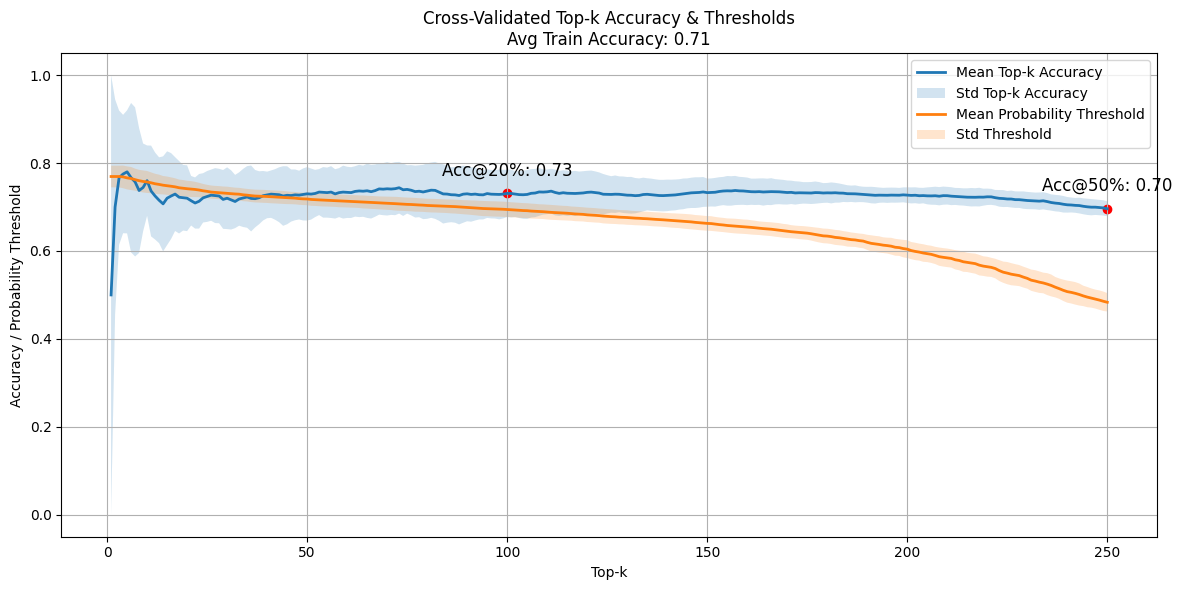

Test Accuracies (Overall): 0.71 ± 0.02
5


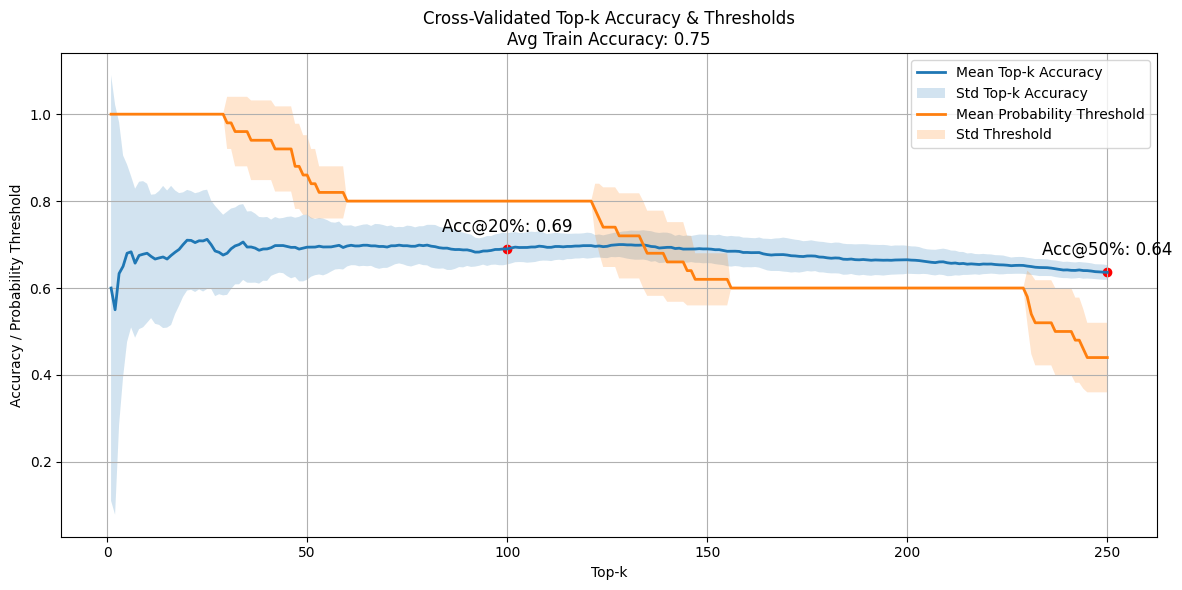

Test Accuracies (Overall): 0.65 ± 0.02
6


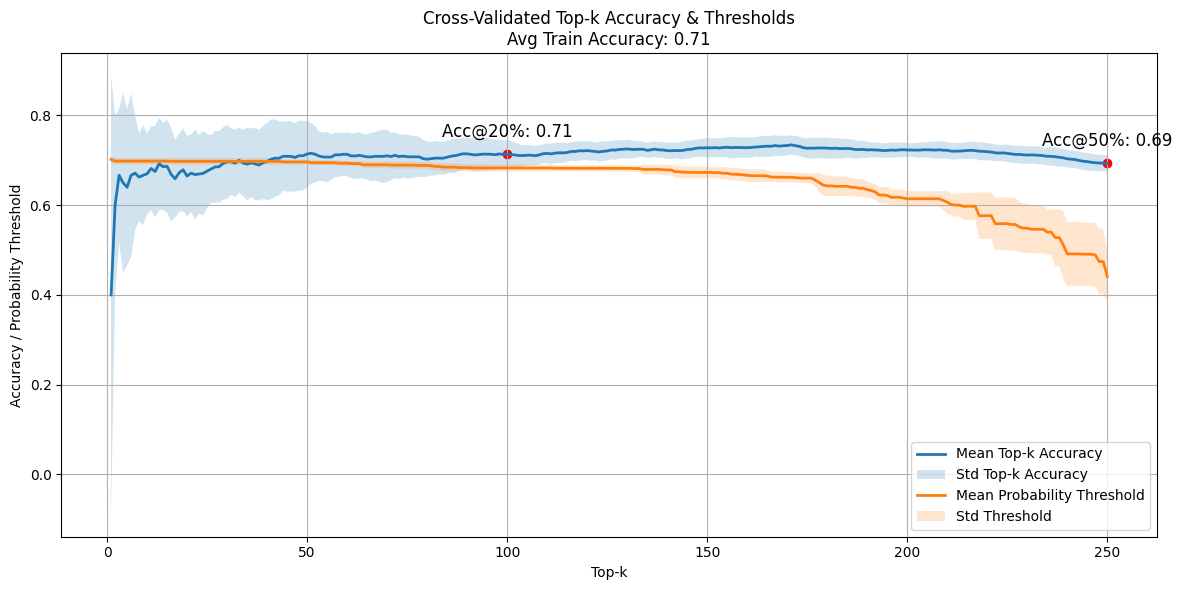

Test Accuracies (Overall): 0.70 ± 0.02
7


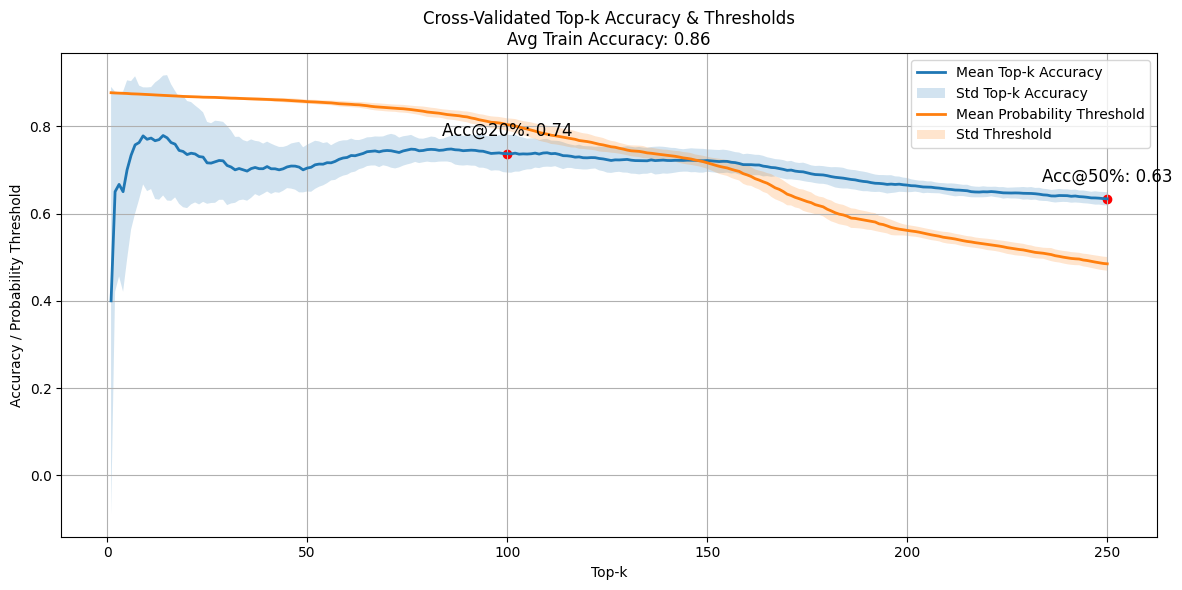

Test Accuracies (Overall): 0.65 ± 0.01
8


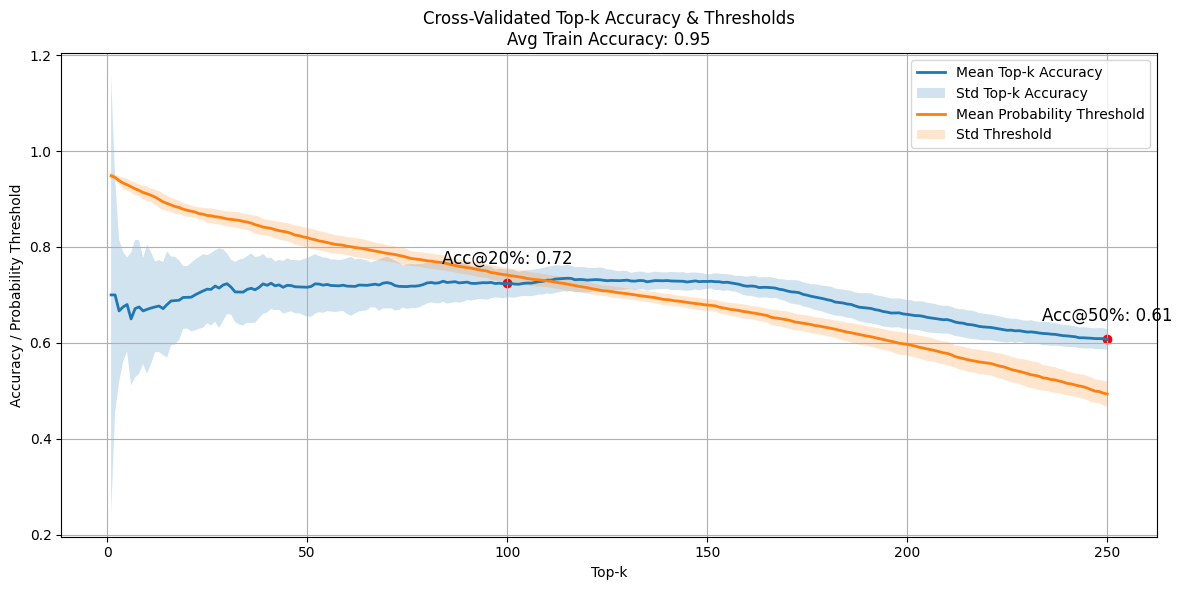

Test Accuracies (Overall): 0.62 ± 0.02
9


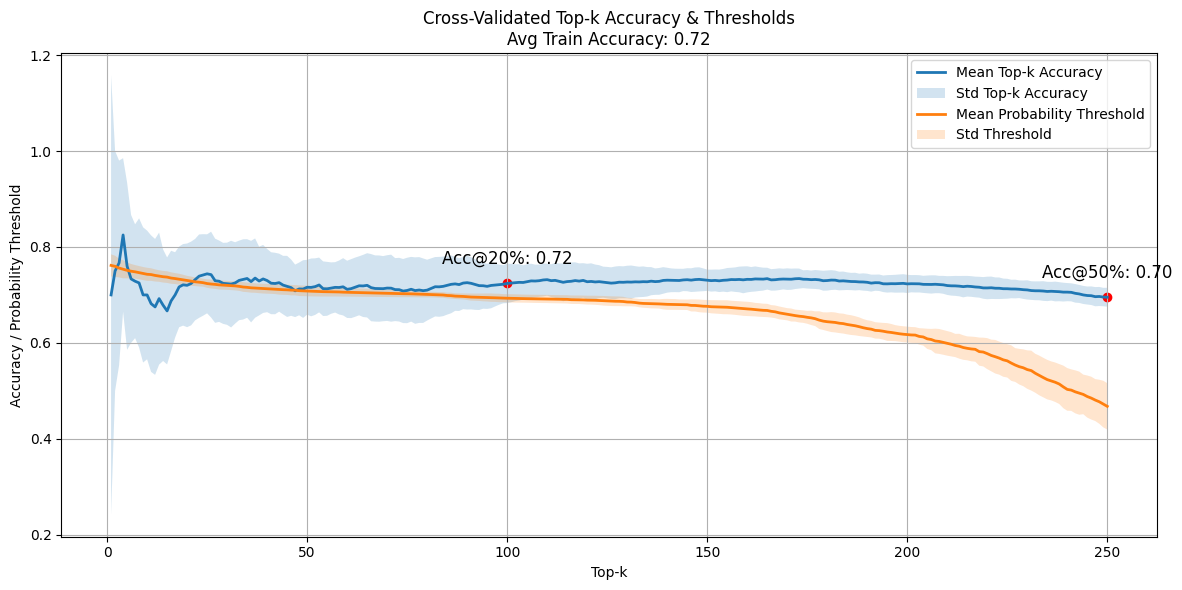

Test Accuracies (Overall): 0.70 ± 0.02


In [68]:
results = []
for idx, model in enumerate(models):
    print(idx)
    comparator = ModelComparator(X,y, n_splits=10, scaling="standard")
    result = comparator.evaluate_model(model, variables=[2])
    results.append(result)

In [69]:
results

[0.7198019801980197,
 0.7,
 0.7306930693069306,
 0.7475247524752474,
 0.7306930693069306,
 0.692079207920792,
 0.7128712871287128,
 0.7366336633663365,
 0.7237623762376236,
 0.7247524752475246]

# Results

In [8]:
X_test = pd.read_table('x_test.txt', sep=" ", header=None).to_numpy()
scaler = column_transformer
column_transformer.fit(np.asarray(X))
X_scaled = column_transformer.transform(X)
X_test_scaled = column_transformer.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but QuantileTransformer was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but PowerTransformer was fitted without feature names
  warnings.warn(


In [75]:
model = SVC(probability=True)
model.fit(X_scaled[:, [2]], y)
y_pred = model.predict_proba(X_test_scaled[:, [2]])

In [78]:
result = np.argsort(y_pred[:, 1])[::-1][:1000]

In [82]:
np.savetxt('result.txt', result, fmt='%d')